In [1]:
import os
import pickle
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score,precision_score

In [2]:
df=pd.read_csv("Ransomware.csv",sep='|')

In [3]:
df

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [4]:
list(df.columns)

['Name',
 'md5',
 'Machine',
 'SizeOfOptionalHeader',
 'Characteristics',
 'MajorLinkerVersion',
 'MinorLinkerVersion',
 'SizeOfCode',
 'SizeOfInitializedData',
 'SizeOfUninitializedData',
 'AddressOfEntryPoint',
 'BaseOfCode',
 'BaseOfData',
 'ImageBase',
 'SectionAlignment',
 'FileAlignment',
 'MajorOperatingSystemVersion',
 'MinorOperatingSystemVersion',
 'MajorImageVersion',
 'MinorImageVersion',
 'MajorSubsystemVersion',
 'MinorSubsystemVersion',
 'SizeOfImage',
 'SizeOfHeaders',
 'CheckSum',
 'Subsystem',
 'DllCharacteristics',
 'SizeOfStackReserve',
 'SizeOfStackCommit',
 'SizeOfHeapReserve',
 'SizeOfHeapCommit',
 'LoaderFlags',
 'NumberOfRvaAndSizes',
 'SectionsNb',
 'SectionsMeanEntropy',
 'SectionsMinEntropy',
 'SectionsMaxEntropy',
 'SectionsMeanRawsize',
 'SectionsMinRawsize',
 'SectionMaxRawsize',
 'SectionsMeanVirtualsize',
 'SectionsMinVirtualsize',
 'SectionMaxVirtualsize',
 'ImportsNbDLL',
 'ImportsNb',
 'ImportsNbOrdinal',
 'ExportNb',
 'ResourcesNb',
 'ResourcesMeanE

In [5]:
df.dtypes

Name                            object
md5                             object
Machine                          int64
SizeOfOptionalHeader             int64
Characteristics                  int64
MajorLinkerVersion               int64
MinorLinkerVersion               int64
SizeOfCode                       int64
SizeOfInitializedData            int64
SizeOfUninitializedData          int64
AddressOfEntryPoint              int64
BaseOfCode                       int64
BaseOfData                       int64
ImageBase                      float64
SectionAlignment                 int64
FileAlignment                    int64
MajorOperatingSystemVersion      int64
MinorOperatingSystemVersion      int64
MajorImageVersion                int64
MinorImageVersion                int64
MajorSubsystemVersion            int64
MinorSubsystemVersion            int64
SizeOfImage                      int64
SizeOfHeaders                    int64
CheckSum                         int64
Subsystem                

In [6]:
df.shape

(138047, 57)

In [7]:
df.isnull().sum()

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

In [8]:
df.legitimate.value_counts() #1 means legitimate, 0 means malware

0    96724
1    41323
Name: legitimate, dtype: int64

In [9]:
df.legitimate = df.legitimate.astype('category')
df.legitimate

0         1
1         1
2         1
3         1
4         1
         ..
138042    0
138043    0
138044    0
138045    0
138046    0
Name: legitimate, Length: 138047, dtype: category
Categories (2, int64): [0, 1]

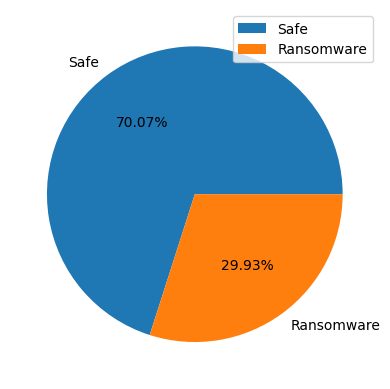

In [10]:
plt.pie(df.legitimate.value_counts().values.tolist(), labels=['Safe','Ransomware'], autopct='%.2f%%')
plt.legend()
plt.show()

C:\Users\JOY DAS\AppData\Local\Temp\ipykernel_11812\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

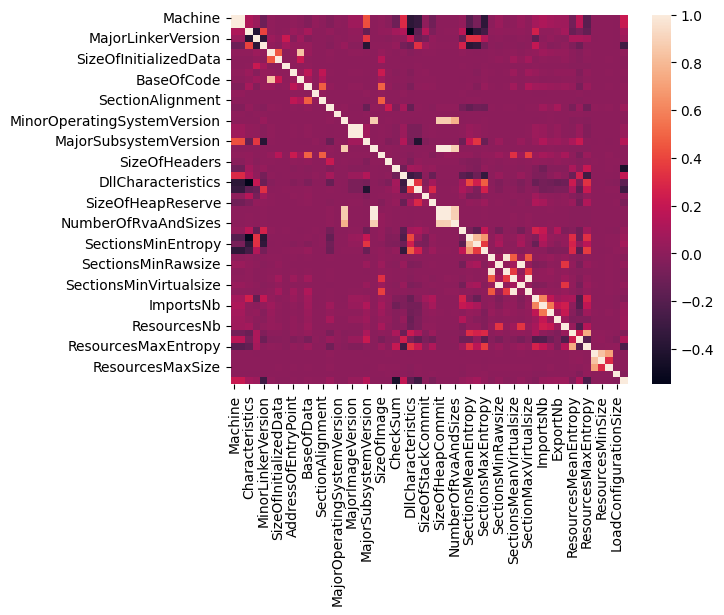

In [11]:
sns.heatmap(df.corr())

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select columns to calculate VIF for
Columns_VIF = df.drop(['legitimate', 'md5', 'Name'], axis=1).columns

# Calculate VIF for each selected column
VIF_Data = pd.DataFrame({'feature': Columns_VIF,
                         'VIF': [variance_inflation_factor(df[Columns_VIF].values, i)
                                 for i in range(len(Columns_VIF))]})
  
# Print VIF_Data
print(VIF_Data)

                        feature           VIF
0                       Machine      1.186139
1          SizeOfOptionalHeader      0.021588
2               Characteristics      1.438634
3            MajorLinkerVersion      1.193997
4            MinorLinkerVersion      1.501500
5                    SizeOfCode      5.133750
6         SizeOfInitializedData      1.566474
7       SizeOfUninitializedData      1.000313
8           AddressOfEntryPoint      1.071064
9                    BaseOfCode      4.264186
10                   BaseOfData      1.919978
11                    ImageBase      1.001121
12             SectionAlignment      2.060313
13                FileAlignment      1.078990
14  MajorOperatingSystemVersion      1.000044
15  MinorOperatingSystemVersion      4.159910
16            MajorImageVersion    201.384174
17            MinorImageVersion    186.603290
18        MajorSubsystemVersion      0.599216
19        MinorSubsystemVersion  17354.946144
20                  SizeOfImage   

In [13]:
df.drop(['MinorImageVersion','MinorSubsystemVersion','SizeOfHeapCommit','SectionsMinRawsize','SectionsMinVirtualsize','SectionMaxVirtualsize' ],axis=1, inplace=True)

C:\Users\JOY DAS\AppData\Local\Temp\ipykernel_11812\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

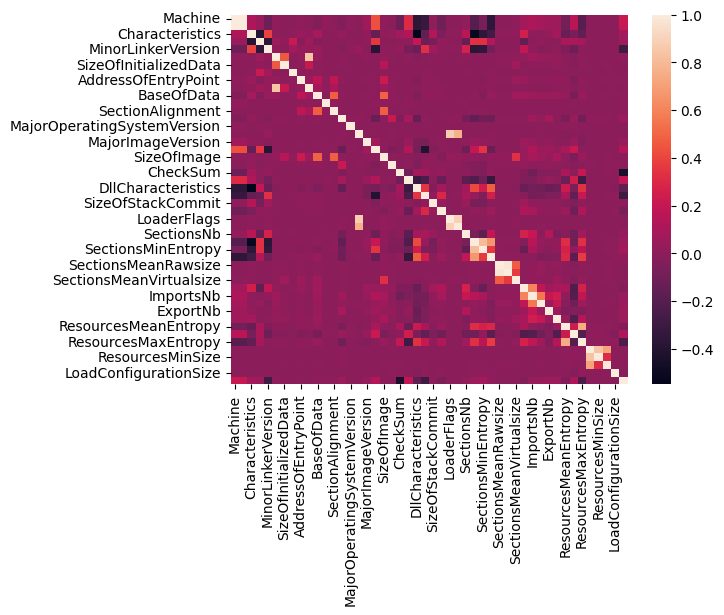

In [14]:
sns.heatmap(df.corr())

In [15]:
def iv_woe(data, target, bins=10, show_woe=False):
    newDF = pd.DataFrame()
    woeDF = pd.DataFrame()

    for ivar in data.columns[data.columns != target]:
        if (data[ivar].dtype.kind in 'bifc') and (len(data[ivar].unique()) > 10):
            binned_x = pd.qcut(data[ivar], bins, duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivar], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events'] / d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivar)
        iv = d['IV'].sum()
        print(f"Information value of {ivar} is {round(iv, 6)}")
        temp = pd.DataFrame({"Variable": [ivar], "IV": [iv]})
        newDF = pd.concat([newDF, temp], ignore_index=True)
        woeDF = pd.concat([woeDF, d], ignore_index=True)

        if show_woe:
            print(d)

    return newDF, woeDF

In [16]:
df['legitimate'] = pd.to_numeric(df['legitimate'], downcast='integer')

In [17]:
cols_to_drop = ['Name']
df_subset = df.drop(cols_to_drop, axis=1)
target_col = 'legitimate'
iv, woe = iv_woe(df_subset, target_col)

Information value of md5 is 1.240653
Information value of Machine is 2.596527
Information value of SizeOfOptionalHeader is 2.596853
Information value of Characteristics is 3.823743
Information value of MajorLinkerVersion is 2.787002
Information value of MinorLinkerVersion is 0.583745
Information value of SizeOfCode is 2.5136
Information value of SizeOfInitializedData is 3.569039
Information value of SizeOfUninitializedData is 0.328101
Information value of AddressOfEntryPoint is 2.351206
Information value of BaseOfCode is 0.031301
Information value of BaseOfData is 2.974971
Information value of ImageBase is 6.097249
Information value of SectionAlignment is 0.163236
Information value of FileAlignment is 0.153303
Information value of MajorOperatingSystemVersion is 4.34342
Information value of MinorOperatingSystemVersion is 0.475603
Information value of MajorImageVersion is 0.181241
Information value of MajorSubsystemVersion is 3.566766
Information value of SizeOfImage is 2.965568
Informat

In [18]:
iv.sort_values('IV', ascending=False)

,Variable,IV
12,ImageBase,6.097249
48,VersionInformationSize,5.187680
32,SectionsMaxEntropy,4.978054
15,MajorOperatingSystemVersion,4.343420
45,ResourcesMinSize,4.272744
24,SizeOfStackReserve,4.161116
3,Characteristics,3.823743
7,SizeOfInitializedData,3.569039
18,MajorSubsystemVersion,3.566766
40,ResourcesNb,3.088450


In [19]:
sorted_iv = iv.sort_values(by='IV', ascending=False)
Features = list(sorted_iv.head(15)['Variable'])

In [20]:
Features

['ImageBase',
 'VersionInformationSize',
 'SectionsMaxEntropy',
 'MajorOperatingSystemVersion',
 'ResourcesMinSize',
 'SizeOfStackReserve',
 'Characteristics',
 'SizeOfInitializedData',
 'MajorSubsystemVersion',
 'ResourcesNb',
 'Subsystem',
 'ResourcesMinEntropy',
 'BaseOfData',
 'SizeOfImage',
 'MajorLinkerVersion']

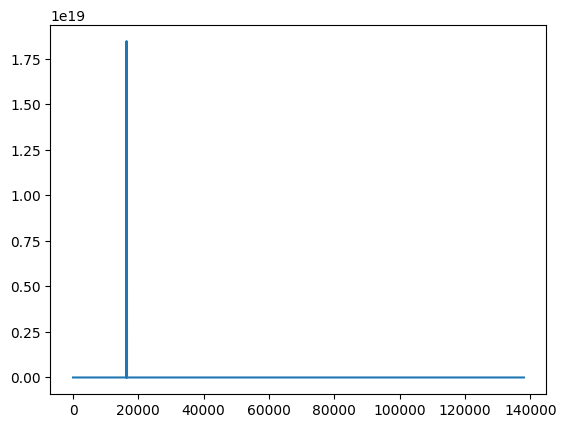

In [21]:
plt.plot(df.ImageBase)

In [22]:
X=df[Features]
Y=df['legitimate']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [24]:
print(X_test.shape[0] + X_train.shape[0])
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

138047
(110437, 15)
(110437,)
(27610, 15)
(27610,)


In [25]:
print(X_train.iloc[0])

ImageBase                      2.025193e+09
VersionInformationSize         1.600000e+01
SectionsMaxEntropy             5.773359e+00
MajorOperatingSystemVersion    6.000000e+00
ResourcesMinSize               9.120000e+02
SizeOfStackReserve             2.621440e+05
Characteristics                8.226000e+03
SizeOfInitializedData          5.120000e+03
MajorSubsystemVersion          6.000000e+00
ResourcesNb                    1.000000e+00
Subsystem                      2.000000e+00
ResourcesMinEntropy            3.577917e+00
BaseOfData                     0.000000e+00
SizeOfImage                    3.276800e+04
MajorLinkerVersion             9.000000e+00
Name: 36133, dtype: float64


In [26]:
print(X_train.iloc[53720])

ImageBase                      4.194304e+06
VersionInformationSize         0.000000e+00
SectionsMaxEntropy             5.655933e+00
MajorOperatingSystemVersion    4.000000e+00
ResourcesMinSize               4.900000e+02
SizeOfStackReserve             1.048576e+06
Characteristics                2.580000e+02
SizeOfInitializedData          1.536000e+03
MajorSubsystemVersion          4.000000e+00
ResourcesNb                    1.000000e+00
Subsystem                      2.000000e+00
ResourcesMinEntropy            5.001117e+00
BaseOfData                     0.000000e+00
SizeOfImage                    7.372800e+04
MajorLinkerVersion             8.000000e+00
Name: 44677, dtype: float64


In [27]:
print(X_train.columns)

Index(['ImageBase', 'VersionInformationSize', 'SectionsMaxEntropy',
       'MajorOperatingSystemVersion', 'ResourcesMinSize', 'SizeOfStackReserve',
       'Characteristics', 'SizeOfInitializedData', 'MajorSubsystemVersion',
       'ResourcesNb', 'Subsystem', 'ResourcesMinEntropy', 'BaseOfData',
       'SizeOfImage', 'MajorLinkerVersion'],
      dtype='object')


In [28]:
from collections import Counter
import imblearn

In [29]:
counter_train = Counter(Y_train)
counter_test = Counter(Y_test)
print(counter_train, counter_test)

# creating imblearn resampling object
# sampling strategy is the propotion of output
# resampled data that is the minority class
over_and_under_sample =  imblearn.combine.SMOTETomek(sampling_strategy = 1.0, n_jobs = -1, random_state = 102)
X_train, Y_train = over_and_under_sample.fit_resample(X_train, Y_train)

# checking under- and over-sample ratios between train and test set.
# DO NOT resample the test set!
counter_train = Counter(Y_train)
counter_test = Counter(Y_test)
print(counter_train, counter_test)

Counter({0: 77258, 1: 33179}) Counter({0: 19466, 1: 8144})


C:\ProgramData\Anaconda3\envs\machinelearning\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Counter({1: 76963, 0: 76963}) Counter({0: 19466, 1: 8144})


In [30]:
print(X_test.shape[0] + X_train.shape[0])
print('Training features shape:', X_train.shape)
print('Training labels shape:', Y_train.shape)
print('Test features shape:', X_test.shape)
print('Test labels shape:', Y_test.shape)

181536
Training features shape: (153926, 15)
Training labels shape: (153926,)
Test features shape: (27610, 15)
Test labels shape: (27610,)


In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
from sklearn.feature_selection import RFE

In [33]:
# RandomForestClassifier is best fitting in Auto-ML
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 103)

In [34]:
# Use the RFE method to select the top 30 features
rfe = RFE(rf, n_features_to_select=30)
rfe.fit(X_train,Y_train)

RFE(estimator=RandomForestClassifier(random_state=103), n_features_to_select=30)

In [35]:
# Assuming your trained model is called `model1`
with open('model1.pkl', 'wb') as f:
    pickle.dump(rfe, f)

In [36]:
pred = rfe.predict(X_test)

In [37]:
# Calculate the accuracy of the ensemble
ensemble_accuracy = accuracy_score(Y_test, pred)
print("Ensemble accuracy of Random Forest Classifier is:", ensemble_accuracy)

Ensemble accuracy of Random Forest Classifier is: 0.9934806229626947


In [38]:
print("Recall Score is: ",recall_score(Y_test,pred))
print("F1 Score is: ",f1_score(Y_test,pred))
print("Precision Score is: ",precision_score(Y_test,pred))

Recall Score is:  0.9911591355599214
F1 Score is:  0.9889732908600833
Precision Score is:  0.9867970660146699


In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
# Train the Gradient Boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=100)

In [41]:
rfe = RFE(gb, n_features_to_select=30)
rfe.fit(X_train, Y_train)

RFE(estimator=GradientBoostingClassifier(random_state=100),
    n_features_to_select=30)

In [42]:
# Assuming your trained model is called `model1`
with open('model2.pkl', 'wb') as ff:
    pickle.dump(rfe, ff)

In [43]:
Predict = rfe.predict(X_test)

In [44]:
# Calculate the accuracy of the ensemble
ensemble_accuracy = accuracy_score(Y_test, Predict)
print("Ensemble accuracy of gradient Boosting Classifier is:", ensemble_accuracy)

Ensemble accuracy of gradient Boosting Classifier is: 0.9885548714233974


In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [46]:
rfe = RFE(knn, n_features_to_select=30)
rfe.fit(X_train, Y_train)

RFE(estimator=KNeighborsClassifier(), n_features_to_select=30)

In [47]:
# Assuming your trained model is called `model1`
with open('model3.pkl', 'wb') as fff:
    pickle.dump(rfe, fff)

In [48]:
Pred = rfe.predict(X_test)

In [49]:
# Calculate the accuracy of the ensemble
ensemble_accuracy = accuracy_score(Y_test, Pred)
print("Ensemble accuracy of KNeighbors Classifier is:", ensemble_accuracy)

Ensemble accuracy of KNeighbors Classifier is: 0.9808764940239044


In [50]:
ensemble_model = VotingClassifier(estimators=[('RF', rf), ('GB', gb), ('KNN', knn)], voting='hard')

In [51]:
# Fit the ensemble model on the training data
ensemble_model.fit(X_train, Y_train)

VotingClassifier(estimators=[('RF', RandomForestClassifier(random_state=103)),
                             ('GB',
                              GradientBoostingClassifier(random_state=100)),
                             ('KNN', KNeighborsClassifier())])

In [52]:
# Save the trained model to a file using pickle
filename = 'Ensemble_model.sav'
pickle.dump(ensemble_model, open(filename, 'wb'))

In [53]:
# Assuming your trained model is called `model1`
with open('ensemble_model.pkl', 'wb') as fff:
    pickle.dump(ensemble_model, fff)

In [54]:
Pred = rfe.predict(X_test)

In [55]:
accuracy = ensemble_model.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9914885910901847


In [56]:
Pred = rfe.predict(X_test)

In [57]:
print("Recall Score - ",recall_score(Y_test,Pred))
print("F1 Score - ",f1_score(Y_test,Pred))
print("Precision Score - ",precision_score(Y_test,Pred))

Recall Score -  0.9836689587426326
F1 Score -  0.9680966767371602
Precision Score -  0.9530097549369498


In [58]:
cm=confusion_matrix(Y_test,pred)
cm

array([[19358,   108],
       [   72,  8072]], dtype=int64)

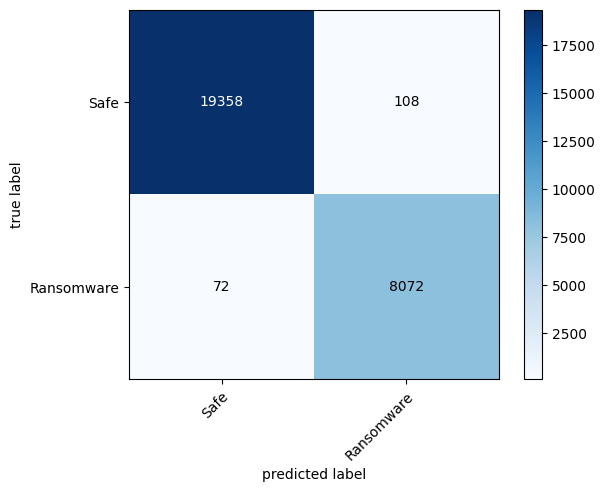

In [59]:
# Classes
classes = ['Safe', 'Ransomware']
figure, ax = plot_confusion_matrix(conf_mat = cm, class_names = classes, colorbar = True)
plt.show()

In [60]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam

# Define the deep learning models
model1 = Sequential()
model1.add(Dense(32, activation='relu', input_dim=15))
model1.add(Dropout(0.5))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

C:\ProgramData\Anaconda3\envs\machinelearning\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [61]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                512       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [62]:
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_dim=15))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

C:\ProgramData\Anaconda3\envs\machinelearning\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [63]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                512       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [64]:
# Train the deep learning models
model1.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
4811/4811 [==============================] - 13s 2ms/step - loss: 653714176.0000 - accuracy: 0.8151
Epoch 2/10
4811/4811 [==============================] - 12s 2ms/step - loss: 16515906.0000 - accuracy: 0.9200
Epoch 3/10
4811/4811 [==============================] - 11s 2ms/step - loss: 25119786.0000 - accuracy: 0.9452
Epoch 4/10
4811/4811 [==============================] - 11s 2ms/step - loss: 8602430.0000 - accuracy: 0.8553
Epoch 5/10
4811/4811 [==============================] - 11s 2ms/step - loss: 3324015.2500 - accuracy: 0.8934
Epoch 6/10
4811/4811 [==============================] - 11s 2ms/step - loss: 803570.1875 - accuracy: 0.9174
Epoch 7/10
4811/4811 [==============================] - 11s 2ms/step - loss: 5611.6226 - accuracy: 0.9146
Epoch 8/10
4811/4811 [==============================] - 10s 2ms/step - loss: 490511.9062 - accuracy: 0.9089
Epoch 9/10
4811/4811 [==============================] - 11s 2ms/step - loss: 19021.1641 - accuracy: 0.9026
Epoch 10/10
4811/4811 

In [65]:
loss,accuracy1 = model1.evaluate(X_test, Y_test)
print("Accuracy:", accuracy1)
print("loss:", loss)

863/863 [==============================] - 2s 2ms/step - loss: 0.1826 - accuracy: 0.9610
Accuracy: 0.9609923958778381
loss: 0.18255983293056488


In [66]:
y_classes = (model1.predict(X_test)>0.5).astype('int32')

863/863 [==============================] - 2s 2ms/step


In [67]:
print(y_classes)

[[1]
 [0]
 [1]
 ...
 [1]
 [0]
 [0]]


In [68]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [69]:
print("  Recall Score  is: ",recall_score(Y_test,y_classes))
print("       F1 Score is: ",f1_score(Y_test,y_classes))
print("Precision Score is: ",precision_score(Y_test,y_classes))

  Recall Score  is:  0.9417976424361493
       F1 Score is:  0.9343972711213984
Precision Score is:  0.9271122930013296


In [70]:
model2.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
4811/4811 [==============================] - 18s 3ms/step - loss: 5093892030464.0000 - accuracy: 0.8183
Epoch 2/10
4811/4811 [==============================] - 25s 5ms/step - loss: 16860952.0000 - accuracy: 0.9496
Epoch 3/10
4811/4811 [==============================] - 13s 3ms/step - loss: 13702699.0000 - accuracy: 0.9447
Epoch 4/10
4811/4811 [==============================] - 13s 3ms/step - loss: 10504817.0000 - accuracy: 0.8469
Epoch 5/10
4811/4811 [==============================] - 16s 3ms/step - loss: 2209727.5000 - accuracy: 0.9157
Epoch 6/10
4811/4811 [==============================] - 12s 3ms/step - loss: 3178280.0000 - accuracy: 0.9084
Epoch 7/10
4811/4811 [==============================] - 12s 3ms/step - loss: 7132.4927 - accuracy: 0.9141
Epoch 8/10
4811/4811 [==============================] - 12s 3ms/step - loss: 1714.6121 - accuracy: 0.9097
Epoch 9/10
4811/4811 [==============================] - 11s 2ms/step - loss: 109322.0938 - accuracy: 0.9163
Epoch 10/10
4811/

In [71]:
loss,accuracy = model2.evaluate(X_test, Y_test)
print("Accuracy:", accuracy)
print("    loss:", loss)

863/863 [==============================] - 2s 2ms/step - loss: 0.3302 - accuracy: 0.8869
Accuracy: 0.8869250416755676
    loss: 0.33024531602859497


In [72]:
Y_classes = (model2.predict(X_test)>0.5).astype('int32')

863/863 [==============================] - 1s 1ms/step


In [73]:
print("   Recall Score is: ",recall_score(Y_test,Y_classes))
print("       F1 Score is: ",f1_score(Y_test,Y_classes))
print("Precision Score is: ",precision_score(Y_test,Y_classes))

   Recall Score is:  0.9553045186640472
       F1 Score is:  0.8328872711701103
Precision Score is:  0.7382805086354147


In [74]:
X_train_new = np.concatenate((model1.predict(X_train), model2.predict(X_train)), axis=1)

4811/4811 [==============================] - 7s 1ms/step


In [75]:
X_test_new = np.concatenate((model1.predict(X_test), model2.predict(X_test)), axis=1)

863/863 [==============================] - 1s 1ms/step


In [76]:
# Define the meta model
meta_input = Input(shape=(2,))
x = Dense(5, activation='relu')(meta_input)
output = Dense(1, activation='sigmoid')(x)
meta_model = Model(inputs=meta_input, outputs=output)

In [77]:
meta_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_8 (Dense)             (None, 5)                 15        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Compile the meta model
meta_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
# Train the meta model on new dataset
meta_model.fit(X_train_new, Y_train, epochs=10, batch_size=32, validation_data=(X_test_new, Y_test))

Epoch 1/10
4811/4811 [==============================] - 13s 3ms/step - loss: 0.3398 - accuracy: 0.9034 - val_loss: 0.1689 - val_accuracy: 0.9614
Epoch 2/10
4811/4811 [==============================] - 11s 2ms/step - loss: 0.1736 - accuracy: 0.9576 - val_loss: 0.1694 - val_accuracy: 0.9614
Epoch 3/10
4811/4811 [==============================] - 11s 2ms/step - loss: 0.1711 - accuracy: 0.9576 - val_loss: 0.1696 - val_accuracy: 0.9614
Epoch 4/10
4811/4811 [==============================] - 13s 3ms/step - loss: 0.1711 - accuracy: 0.9576 - val_loss: 0.1756 - val_accuracy: 0.9610
Epoch 5/10
4811/4811 [==============================] - 10s 2ms/step - loss: 0.1711 - accuracy: 0.9576 - val_loss: 0.1708 - val_accuracy: 0.9614
Epoch 6/10
4811/4811 [==============================] - 11s 2ms/step - loss: 0.1711 - accuracy: 0.9576 - val_loss: 0.1691 - val_accuracy: 0.9614
Epoch 7/10
4811/4811 [==============================] - 11s 2ms/step - loss: 0.1711 - accuracy: 0.9576 - val_loss: 0.1709 - val_ac

In [80]:
# Evaluate the accuracy of the ensemble
y_pred = meta_model.predict(X_test_new)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy of the Meta-Model is: {:.2f}%".format(accuracy*100))

863/863 [==============================] - 1s 1ms/step
Accuracy of the Meta-Model is: 96.14%


In [81]:
y_classes = (meta_model.predict(X_test_new)>0.5).astype('int32')

863/863 [==============================] - 2s 2ms/step


In [82]:
print("   Recall Score is: ",recall_score(Y_test,y_classes))
print("       F1 Score is: ",f1_score(Y_test,y_classes))
print("Precision Score is: ",precision_score(Y_test,y_classes))

   Recall Score is:  0.9411836935166994
       F1 Score is:  0.9349271208147834
Precision Score is:  0.9287531806615776


In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
tree1 = DecisionTreeClassifier(max_depth=5, random_state=104)
tree2 = DecisionTreeClassifier(max_depth=7, random_state=105)
tree3 = DecisionTreeClassifier(max_depth=9, random_state=106)
tree4 = DecisionTreeClassifier(max_depth=8, random_state=107)

In [85]:
# Create an ensemble of the decision tree classifiers
ensemble = VotingClassifier(estimators=[('tree1', tree1), ('tree2', tree2), ('tree3', tree3), ('tree4', tree4)], voting='hard')

# Train the ensemble model
ensemble.fit(X_train, Y_train)

VotingClassifier(estimators=[('tree1',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=104)),
                             ('tree2',
                              DecisionTreeClassifier(max_depth=7,
                                                     random_state=105)),
                             ('tree3',
                              DecisionTreeClassifier(max_depth=9,
                                                     random_state=106)),
                             ('tree4',
                              DecisionTreeClassifier(max_depth=8,
                                                     random_state=107))])

In [86]:
# Make predictions on the testing data
y_pred = ensemble.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy is: %.2f%%" % (accuracy * 100.0))

Accuracy is: 98.80%


In [87]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [88]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)

print(models)

 59%|█████▊    | 17/29 [1:26:37<1:01:08, 305.71s/it]


KeyboardInterrupt: 